# Куличенко Владимир 
# БПМ172
# Вариант 16

## №3.1.16

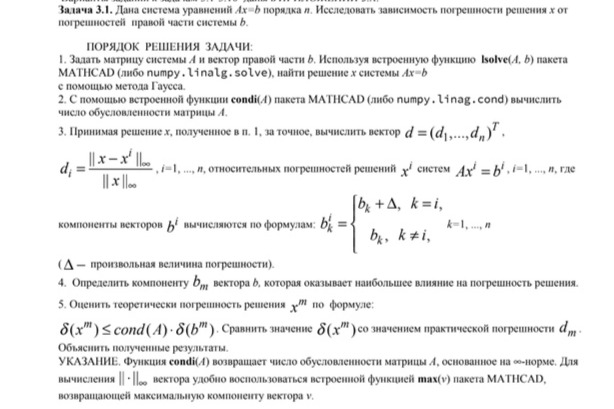

In [1]:
from IPython.display import Image
Image("lab4_task1.jpg")

Компоненты вектора $b$ задаются формулой $b_i = N , \ \forall i=1...n$, коэффициенты $c = c_{ij} = 0.1 \cdot N \cdot i \cdot j , \ \forall i,j = 1...n \\ N = 16$

Вариант 16:

$n = 5 \\ a_{ij} = \frac{100}{(3+0.3 \cdot c )^5}$

In [2]:
import numpy as np

### Пункт 1.

#### Создаем матрицу А и вектор правой части b

In [40]:
N = 16
n = 5
b = N * np.ones(n)
A = np.array([[100/(3 + 0.3 * (0.1 * N * i * j))**5 
               for i in range(1, n + 1)] 
              for j in range(1, n + 1)])

print('Матрица A: \n', A)
print('\n')
print('Вектор b: \n', b)

Матрица A: 
 [[1.95931282e-01 1.02689034e-01 5.79542313e-02 3.46876187e-02
  2.17786623e-02]
 [1.02689034e-01 3.46876187e-02 1.42270012e-02 6.67912377e-03
  3.46359406e-03]
 [5.79542313e-02 1.42270012e-02 4.75822084e-03 1.93856099e-03
  9.05730810e-04]
 [3.46876187e-02 6.67912377e-03 1.93856099e-03 7.19687130e-04
  3.14881593e-04]
 [2.17786623e-02 3.46359406e-03 9.05730810e-04 3.14881593e-04
  1.31687243e-04]]


Вектор b: 
 [16. 16. 16. 16. 16.]


#### Находим решения системы

In [41]:
x = np.linalg.solve(A, b)

print('Решения системы уравнений: \n', x)

Решения системы уравнений: 
 [    7232.27060304  -161559.45508072  1013642.87351132 -2250897.38937448
  1585163.16138674]


### Пункт 2.

#### Вычисляем число обусловленности матрицы A

In [42]:
cond_A = np.linalg.cond(A)

print('Число обусловленности матрицы A:\n', cond_A)

Число обусловленности матрицы A:
 654297.1718747513


### Пункт 3.

#### Вычислить вектор относительных погрешностей $d$ решений $x$

In [43]:
# Погрешность
delta = 1e-3

d = []
for i in range(n):
    # Задаем вектор b_k
    b_k = np.array(b)
    
    # По условию только в случае k=i добавляется погрешность
    b_k[i] += delta
    
    # Находим новое решение системы с новым вектором b
    x_i = np.linalg.solve(A, b_k)
    
    # Находим компоненту вектора d
    d.append(np.linalg.norm(x - x_i, np.inf) / np.linalg.norm(x, np.inf))
    
print('Вектор относительных погрешностей d_i решений x_i систем Ax_i = b_i: \n', d)

Вектор относительных погрешностей d_i решений x_i систем Ax_i = b_i: 
 [1.1803702445622166e-06, 3.720113323422554e-05, 0.00026734375629930873, 0.0006373935809160215, 0.00046857058760658846]


### Пункт 4.

#### Определить компоненту $b_m$ вектора $b$, которая оказывает наибольшее влияние на погрешность решения

In [44]:
print('Индекс максимальной компоненты вектора d:\n', np.argmax(d))

Индекс максимальной компоненты вектора d:
 3


### Пункт 5.

#### Оценить теоретически погрешность решения $x_m$: $\delta (x^m) \leq cond(A) \cdot \delta (b^m)$

In [45]:
b_k = np.array(b)
b_k[np.argmax(d)] += delta

th_error = cond_A * np.linalg.norm(b - b_k[np.argmax(d)], np.inf) / np.linalg.norm(b, np.inf)

print('Теоретическая погрешность решения x_m: ', th_error)

Теоретическая погрешность решения x_m:  40.89357324222193


Оценка $\delta (x^m) \leq cond (A) \cdot \delta (b^m)$ оказалось верной, в частности в силу того, что число обусловленности матрицы очень велико.

## №3.2

Для системы уравнений $Ax=b$ из задачи 3.1 исследовать зависимость погрешности решения системы от погрешностей коэффициентов матрицы $A$ (аналогично задаче 3.1). Теоретическая оценка погрешности в этом случае имеет вид: $\delta (x^*) \leq cond (A) \cdot \delta (A^*)$, где $x^*$- решение системы с возмущенной матрицей $A^*$.

In [46]:
A

array([[1.95931282e-01, 1.02689034e-01, 5.79542313e-02, 3.46876187e-02,
        2.17786623e-02],
       [1.02689034e-01, 3.46876187e-02, 1.42270012e-02, 6.67912377e-03,
        3.46359406e-03],
       [5.79542313e-02, 1.42270012e-02, 4.75822084e-03, 1.93856099e-03,
        9.05730810e-04],
       [3.46876187e-02, 6.67912377e-03, 1.93856099e-03, 7.19687130e-04,
        3.14881593e-04],
       [2.17786623e-02, 3.46359406e-03, 9.05730810e-04, 3.14881593e-04,
        1.31687243e-04]])

In [47]:
delta = 1e-3
error_list = []
max_value = 0

for i in range(n):
    for j in range(n):
        A_k = np.copy(A)
        A_k[i][j] += delta
        
        x_k = np.linalg.solve(A_k,b)
        
        error = np.linalg.norm(x - x_k, np.inf) / np.linalg.norm(x, np.inf)
        error_list.append(error)
        
        if (error >= max(error_list)):
            max_value = error
            
print('Погрешности: \n', error_list)

Погрешности: 
 [0.008518242079326957, 0.21134655356237175, 0.6258892347894179, 1.6035395292387542, 0.568235635741874, 0.2981778469528477, 1.2390156193786979, 1.2186131593094454, 0.9881986312467713, 0.9122450046993037, 1.011437311489916, 1.395812707873996, 1.1076618525677944, 1.0016645489079234, 0.9344794066589446, 2.7821982466920687, 1.215269073380095, 1.0754475065893703, 0.9993034793179916, 0.9588769941433325, 1.0291671932667126, 1.1710859138571654, 1.0473352338928628, 1.0009490328437027, 0.9701303402081382]


In [50]:
error_matrix = np.array(error_list).reshape(5,5)
(index_1, index_2) = np.where(error_matrix == max_value)

print('Матрица погрешностей: \n', error_matrix)
print('\nПоложение элемента макимальной погрешности: ', index_1,index_2)

Матрица погрешностей: 
 [[0.00851824 0.21134655 0.62588923 1.60353953 0.56823564]
 [0.29817785 1.23901562 1.21861316 0.98819863 0.912245  ]
 [1.01143731 1.39581271 1.10766185 1.00166455 0.93447941]
 [2.78219825 1.21526907 1.07544751 0.99930348 0.95887699]
 [1.02916719 1.17108591 1.04733523 1.00094903 0.97013034]]

Положение элемента макимальной погрешности:  [3] [0]


Составляем возмущенную матрицу $A^*$

In [66]:
A_max = np.copy(A)

A_max[index_1[0]][index_2[0]] += delta

print('Возмущенная матрица A*: \n', A_max)

Возмущенная матрица A*: 
 [[1.95931282e-01 1.02689034e-01 5.79542313e-02 3.46876187e-02
  2.17786623e-02]
 [1.02689034e-01 3.46876187e-02 1.42270012e-02 6.67912377e-03
  3.46359406e-03]
 [5.79542313e-02 1.42270012e-02 4.75822084e-03 1.93856099e-03
  9.05730810e-04]
 [3.56876187e-02 6.67912377e-03 1.93856099e-03 7.19687130e-04
  3.14881593e-04]
 [2.17786623e-02 3.46359406e-03 9.05730810e-04 3.14881593e-04
  1.31687243e-04]]


Проведем оценку погрешности $\delta (x^*) \leq cond(A) \cdot \delta (A^*)$

In [73]:
delta_A = np.linalg.norm(A-A_max, np.inf)/np.linalg.norm(A,np.inf)

print("delta(x^m) <= ", cond_A*delta_A)

print("\nВозьмем макимальное значение delta(x^m): \n", 
     max_value, " <= ", cond_A*delta_A)

delta(x^m) <=  1584.0980511932228

Возьмем макимальное значение delta(x^m): 
 2.7821982466920687  <=  1584.0980511932228


#### Теоретическая оценка выполнена.

## №3.10.4

Дана система уравнений $Ax=b$ порядка $n$ с разреженной матрицей $A$. Решить систему методом прогонки.  
УКАЗАНИЕ. Предусмотреть компактное размещение элементов матрицы в памяти ЭВМ.

$N = 3.10.4$  
$n = 50$  
$A$: На главной диагонали элементы равны 100, на первой наддиагонали элементы равны 1, на 1 поддиагонали элементы равны 2, $a_{1,n-1} = a_{2,n}=1$.  
$b_i=i \cdot e^{\frac{10}{i}} cos(\frac{9}{i}), \ i=1,...,n$

Комментарий: Анна Сергеевна сказала убрать условие $a_{1,n-1} = a_{2,n}=1$

In [103]:
n = 50

# Элементы главной диагонали равны 100
A = 100 * np.eye(n,n)

# Элементы первой наддиагонали равны 1
A = A + np.eye(n,n,k=1)

# Элементы первой поддиагонали равны 2
A = A + 2 * np.eye(n,n,k=-1)

# Элементы a_1,n-1 и a_2,n равны 1
#A[0][n-2] = 1
#A[1][n-1] = 1

A

array([[100.,   1.,   0., ...,   0.,   0.,   0.],
       [  2., 100.,   1., ...,   0.,   0.,   0.],
       [  0.,   2., 100., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 100.,   1.,   0.],
       [  0.,   0.,   0., ...,   2., 100.,   1.],
       [  0.,   0.,   0., ...,   0.,   2., 100.]])

In [104]:
# Задаем вектор b
b = [i * np.exp(10/i) * np.cos(9/i) for i in range(1,n+1)]

b

[-20068.979548016123,
 -62.56974103815027,
 -83.25329493929738,
 -30.610885460371968,
 -8.394045117408872,
 2.2471044625664702,
 8.214666222294326,
 12.039631350649216,
 14.77164135601457,
 16.897110811391507,
 18.66275604771347,
 20.20318136295964,
 21.596324798255726,
 22.889588194302096,
 24.1130140868156,
 25.286320415701116,
 26.422842790158516,
 27.531837794925615,
 28.619878286404045,
 29.69172581578308,
 30.75089156049206,
 31.800006030321207,
 32.84106819533353,
 33.875616736646506,
 34.90484990016901,
 35.9297107590532,
 36.95094877729117,
 37.96916487078411,
 38.9848448043778,
 39.998384230854526,
 41.01010766452479,
 42.020283001280866,
 43.02913273284739,
 44.036842682197225,
 45.04356886258152,
 46.04944290359876,
 47.05457637383962,
 48.059064247229614,
 49.0629876999691,
 50.066416380558195,
 51.06941026235859,
 52.07202116336846,
 53.07429399916307,
 54.07626782069895,
 55.07797667775226,
 56.07945034033035,
 57.08071490384797,
 58.081793298745986,
 59.082705721212676,

#### сохраняем элементы диагоналей для компактного размещения в памяти ЭВМ

In [129]:
main_diag = A.ravel()[0::n+1]
lower_diag = A.ravel()[n::n+1]
upper_diag = A.ravel()[1::n+1]

Пишем основную функцию

In [137]:
def solve2(main_d, lower_d, upper_d, b, n):
    ''' Функция будет находить решение системы линейных уравнений методом 
    подгонки для 4х диагональной матрицы с 1 поддиагональю и 1 наддиагональю.
    
    maid_d - элементы клавной диагонали
    lower_d - элементы 1 поддиагонали
    upper_d - элементы 1 наддиагонали
    b - вектор b уравнения Ax=b
    n - размер матрицы
    
    Возвращает вектор х уравнения Ax=b
    '''
    
    alpha = np.zeros(n)
    betta = np.zeros(n)
    
    for i in range(n-1):
        y = main_d[i] + upper_d[i] * alpha[i]
        
        alpha[1 + i] = -upper_d[i] / y
        betta[1 + i] = (b[i] - lower_d[i] * betta[i]) / y
    
    x = np.zeros(n)
    
    # из последнего уравнения находим x_n
    x[n - 1] = (b[n-1] - lower_d[n-2] * betta[n-1]) / (main_d[n-1] + lower_d[n-2] * alpha[n-1])

    for i in reversed(range(n-1)):
        x[i] = alpha[i + 1] * x[i + 1] + betta[i + 1]
    return x

In [138]:
solve2(main_diag, lower_diag, upper_diag, b, n)

array([-2.00723770e+02,  3.39741342e+00, -8.97518001e-01, -2.87345577e-01,
       -7.84180178e-02,  2.32320756e-02,  8.05005954e-02,  1.17337440e-01,
        1.43712624e-01,  1.64266815e-01,  1.81361216e-01,  1.96287027e-01,
        2.09793169e-01,  2.22335742e-01,  2.34204119e-01,  2.45588389e-01,
        2.56617197e-01,  2.67379894e-01,  2.77939954e-01,  2.88343381e-01,
        2.98624107e-01,  3.08807564e-01,  3.18913081e-01,  3.28955542e-01,
        3.38946538e-01,  3.48895196e-01,  3.58808769e-01,  3.68693072e-01,
        3.78552809e-01,  3.88391811e-01,  3.98213219e-01,  4.08019628e-01,
        4.17813192e-01,  4.27595712e-01,  4.37368699e-01,  4.47133427e-01,
        4.56890979e-01,  4.66642273e-01,  4.76388097e-01,  4.86129125e-01,
        4.95865938e-01,  5.05599039e-01,  5.15328863e-01,  5.25055789e-01,
        5.34780145e-01,  5.44502222e-01,  5.54222266e-01,  5.63941116e-01,
        5.73597242e-01,  5.89362755e-01])

Сравним с ответами, который выдает $np.linalg.solve$

In [122]:
np.linalg.solve(A,b)

array([-2.00723773e+02,  3.39775419e+00, -8.97614310e-01, -2.87372315e-01,
       -7.84253495e-02,  2.32344668e-02,  8.05084841e-02,  1.17348878e-01,
        1.43726608e-01,  1.64282788e-01,  1.81378844e-01,  1.96306101e-01,
        2.09813553e-01,  2.22357342e-01,  2.34226872e-01,  2.45612245e-01,
        2.56642124e-01,  2.67405866e-01,  2.77966952e-01,  2.88371388e-01,
        2.98653112e-01,  3.08837557e-01,  3.18944056e-01,  3.28987492e-01,
        3.38979458e-01,  3.48929082e-01,  3.58843617e-01,  3.68728881e-01,
        3.78589575e-01,  3.88429532e-01,  3.98251893e-01,  4.08059254e-01,
        4.17853770e-01,  4.27637240e-01,  4.37411175e-01,  4.47176852e-01,
        4.56935351e-01,  4.66687592e-01,  4.76434362e-01,  4.86176336e-01,
        4.95914095e-01,  5.05648141e-01,  5.15378909e-01,  5.25106779e-01,
        5.34832080e-01,  5.44555101e-01,  5.54276088e-01,  5.63995876e-01,
        5.73653523e-01,  5.89361630e-01])

### Как можно заметить, ответы совпали